In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
train= pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\covid\train.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\4184157729.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train= pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\covid\train.csv')


In [8]:
train.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0


In [9]:
train.tail()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
969635,969636,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0
969636,969637,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27
969637,969638,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0
969638,969639,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6
969639,969640,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-10,Fatalities,0


In [10]:
test = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\covid\test.csv')

In [11]:
test.head()

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


In [12]:
test.tail()

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target
311665,311666,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities
311666,311667,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases
311667,311668,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities
311668,311669,NaN,NaN,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases
311669,311670,NaN,NaN,Zimbabwe,14240168,0.607106,2020-06-10,Fatalities


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              969640 non-null  int64  
 1   County          880040 non-null  object 
 2   Province_State  917280 non-null  object 
 3   Country_Region  969640 non-null  object 
 4   Population      969640 non-null  int64  
 5   Weight          969640 non-null  float64
 6   Date            969640 non-null  object 
 7   Target          969640 non-null  object 
 8   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 66.6+ MB


there are missing values in column country and provinince_state

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311670 entries, 0 to 311669
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ForecastId      311670 non-null  int64  
 1   County          282870 non-null  object 
 2   Province_State  294840 non-null  object 
 3   Country_Region  311670 non-null  object 
 4   Population      311670 non-null  int64  
 5   Weight          311670 non-null  float64
 6   Date            311670 non-null  object 
 7   Target          311670 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 19.0+ MB


in test data, there is no missing values

In [15]:
train.isnull().sum()

Id                    0
County            89600
Province_State    52360
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

as we can see that there are 89600 missing values in column Country and 52360 missing values in province_state. this is huge number of missing data in both column. so let's delete both columns.


In [16]:
train.dropna(axis=1,inplace=True)

In [17]:
test.drop(['County','Province_State'],axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              969640 non-null  int64  
 1   Country_Region  969640 non-null  object 
 2   Population      969640 non-null  int64  
 3   Weight          969640 non-null  float64
 4   Date            969640 non-null  object 
 5   Target          969640 non-null  object 
 6   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 51.8+ MB


In [19]:
train.duplicated().sum()

0

as there is no duplicated in data. and there is no use of ID for analysis. let's drop column from train and test data.

In [20]:
train.drop(['Id'],axis=1,inplace=True)

In [21]:
test.drop(['ForecastId'],axis=1,inplace=True)

In [22]:
train

,Country_Region,Population,Weight,Date,Target,TargetValue
0,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
...,...,...,...,...,...,...
969635,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0
969636,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27
969637,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0
969638,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6


In [23]:
test

,Country_Region,Population,Weight,Date,Target
0,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
1,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
2,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
3,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
4,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases
...,...,...,...,...,...
311665,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities
311666,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases
311667,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities
311668,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases


In [24]:
train.nunique()

Country_Region     187
Population        3408
Weight            6816
Date               140
Target               2
TargetValue       2603
dtype: int64

In [25]:
train[train['Target'] =='ConfirmedCases'].count()

Country_Region    484820
Population        484820
Weight            484820
Date              484820
Target            484820
TargetValue       484820
dtype: int64

In [26]:
train[train['Target'] =='Fatalities'].count()

Country_Region    484820
Population        484820
Weight            484820
Date              484820
Target            484820
TargetValue       484820
dtype: int64

In [27]:
train.describe()

,Population,Weight,TargetValue
count,9.696400e+05,969640.000000,969640.000000
mean,2.720127e+06,0.530870,12.563518
std,3.477771e+07,0.451909,302.524795
min,8.600000e+01,0.047491,-10034.000000
25%,1.213300e+04,0.096838,0.000000
50%,3.053100e+04,0.349413,0.000000
75%,1.056120e+05,0.968379,0.000000
max,1.395773e+09,2.239186,36163.000000


In [28]:
# ADD a column for cases
data = [train,test]
for dataset in data:
    dataset['Cases'] = dataset['Population']*dataset['Weight']

cases will represent the number of cases of country on a perticular date, these are confirmed case and death

In [29]:
train

,Country_Region,Population,Weight,Date,Target,TargetValue,Cases
0,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0,1.614036e+06
1,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0,1.614036e+07
2,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0,1.614036e+06
3,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0,1.614036e+07
4,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0,1.614036e+06
...,...,...,...,...,...,...,...
969635,Zimbabwe,14240168,0.607106,2020-06-08,Fatalities,0,8.645297e+06
969636,Zimbabwe,14240168,0.060711,2020-06-09,ConfirmedCases,27,8.645297e+05
969637,Zimbabwe,14240168,0.607106,2020-06-09,Fatalities,0,8.645297e+06
969638,Zimbabwe,14240168,0.060711,2020-06-10,ConfirmedCases,6,8.645297e+05


In [30]:
for dataset in data:
    dataset['Target'] = dataset['Target'].map({'ConfirmedCases':0,'Fatalities':1})
        

In [31]:
train

,Country_Region,Population,Weight,Date,Target,TargetValue,Cases
0,Afghanistan,27657145,0.058359,2020-01-23,0,0,1.614036e+06
1,Afghanistan,27657145,0.583587,2020-01-23,1,0,1.614036e+07
2,Afghanistan,27657145,0.058359,2020-01-24,0,0,1.614036e+06
3,Afghanistan,27657145,0.583587,2020-01-24,1,0,1.614036e+07
4,Afghanistan,27657145,0.058359,2020-01-25,0,0,1.614036e+06
...,...,...,...,...,...,...,...
969635,Zimbabwe,14240168,0.607106,2020-06-08,1,0,8.645297e+06
969636,Zimbabwe,14240168,0.060711,2020-06-09,0,27,8.645297e+05
969637,Zimbabwe,14240168,0.607106,2020-06-09,1,0,8.645297e+06
969638,Zimbabwe,14240168,0.060711,2020-06-10,0,6,8.645297e+05


In [32]:
train.describe()

,Population,Weight,Target,TargetValue,Cases
count,9.696400e+05,969640.000000,969640.0,969640.000000,9.696400e+05
mean,2.720127e+06,0.530870,0.5,12.563518,8.173019e+05
std,3.477771e+07,0.451909,0.5,302.524795,1.198266e+07
min,8.600000e+01,0.047491,0.0,-10034.000000,1.925700e+01
25%,1.213300e+04,0.096838,0.0,0.000000,2.664201e+03
50%,3.053100e+04,0.349413,0.5,0.000000,1.143104e+04
75%,1.056120e+05,0.968379,1.0,0.000000,4.304159e+04
max,1.395773e+09,2.239186,1.0,36163.000000,6.628638e+08


In [33]:
import seaborn as sns

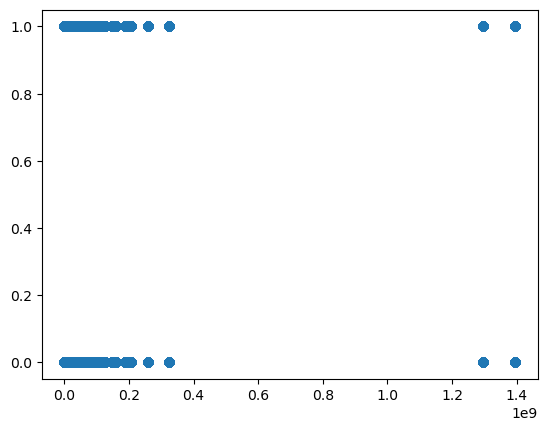

In [34]:
plt.scatter(train['Population'],train['Target'])

<AxesSubplot:>

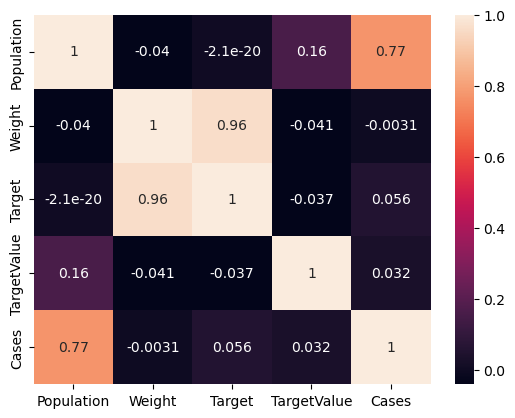

In [35]:
sns.heatmap(train.corr(),annot=True)

# Decision Tree

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
pop = LabelEncoder()
date = LabelEncoder()
cont = LabelEncoder()

In [38]:
data = [train,test]
for dataset in data:
    dataset['Country_Region'] = cont.fit_transform(dataset['Country_Region'])
    dataset['Population'] = pop.fit_transform(dataset['Population'])
    dataset['Date'] = date.fit_transform(dataset['Date'])

In [39]:
train

,Country_Region,Population,Weight,Date,Target,TargetValue,Cases
0,0,3339,0.058359,0,0,0,1.614036e+06
1,0,3339,0.583587,0,1,0,1.614036e+07
2,0,3339,0.058359,1,0,0,1.614036e+06
3,0,3339,0.583587,1,1,0,1.614036e+07
4,0,3339,0.058359,2,0,0,1.614036e+06
...,...,...,...,...,...,...,...
969635,186,3304,0.607106,137,1,0,8.645297e+06
969636,186,3304,0.060711,138,0,27,8.645297e+05
969637,186,3304,0.607106,138,1,0,8.645297e+06
969638,186,3304,0.060711,139,0,6,8.645297e+05


In [40]:
x_train = train[['Country_Region','Population','Weight','Date']]

In [41]:
y_train= train['Target']

In [42]:
x_test = test[['Country_Region','Population','Weight','Date']]
y_test = test['Target']

In [43]:
from sklearn.tree import DecisionTreeClassifier 

In [44]:
dtc = DecisionTreeClassifier()

In [45]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
dtc.score(x_test,y_test)

1.0

as we can see that accuracy is 100%. so it is a overfit model. let's try another one.

# Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
model.score(x_test,y_test)

1.0

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
knn.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0